In [1]:
# Installing Liabaries
import pandas as pd

In [3]:
txrn=pd.read_csv('Retail_Data_Transactions.csv')
txrn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [4]:
response=pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [5]:
df=txrn.merge(response, on='customer_id', how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [6]:
# Features

df.dtypes
df.shape

(125000, 4)

In [7]:
df.head()

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0


In [8]:
df.tail()

,customer_id,trans_date,tran_amount,response
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0
124999,CS7996,13-Dec-14,36,0.0


In [9]:
df.describe()

,tran_amount,response
count,125000.000000,124969.000000
mean,64.991912,0.110763
std,22.860006,0.313840
min,10.000000,0.000000
25%,47.000000,0.000000
50%,65.000000,0.000000
75%,83.000000,0.000000
max,105.000000,1.000000


In [10]:
# Missing Values

df.isnull().sum()

customer_id     0
trans_date      0
tran_amount     0
response       31
dtype: int64

In [11]:
(31/125000)*100

0.024800000000000003

In [12]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [13]:
#Change dtype

df['trans_data']=pd.to_datetime(df['trans_date'])
df

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\1700847848.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_data']=pd.to_datetime(df['trans_date'])
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\1700847848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trans_data']=pd.to_datetime(df['trans_date'])


,customer_id,trans_date,tran_amount,response,trans_data
0,CS5295,11-Feb-13,35,1.0,2013-02-11
1,CS4768,15-Mar-15,39,1.0,2015-03-15
2,CS2122,26-Feb-13,52,0.0,2013-02-26
3,CS1217,16-Nov-11,99,0.0,2011-11-16
4,CS1850,20-Nov-13,78,0.0,2013-11-20
...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0,2011-06-26
124996,CS7232,19-Aug-14,38,0.0,2014-08-19
124997,CS8731,28-Nov-14,42,0.0,2014-11-28
124998,CS8133,14-Dec-13,13,0.0,2013-12-14


In [14]:
df['response']=df['response'].astype('int64')
set(df['response'])


C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\3489213795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype('int64')


{0, 1}

In [15]:
df.dtypes

customer_id            object
trans_date             object
tran_amount             int64
response                int64
trans_data     datetime64[ns]
dtype: object

In [16]:
# Check for Outliers
#Z-Score

from scipy import stats
import numpy as np 

z_scores=np.abs(stats.zscore(df['tran_amount']))

#Set a threshold

threshold= 3

outliers= z_scores> threshold

print(outliers)

0         False
1         False
2         False
3         False
4         False
          ...  
124995    False
124996    False
124997    False
124998    False
124999    False
Name: tran_amount, Length: 124969, dtype: bool


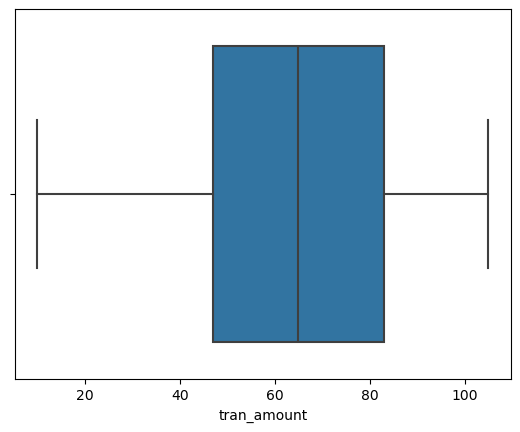

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x= df['tran_amount'])
plt.show()

In [19]:
# creating new columns
import matplotlib.dates as mdates

df['month']=pd.to_datetime(df['trans_date']).dt.to_period('M').astype(str)
df

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\1858024863.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month']=pd.to_datetime(df['trans_date']).dt.to_period('M').astype(str)
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\1858024863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=pd.to_datetime(df['trans_date']).dt.to_period('M').astype(str)


,customer_id,trans_date,tran_amount,response,trans_data,month
0,CS5295,11-Feb-13,35,1,2013-02-11,2013-02
1,CS4768,15-Mar-15,39,1,2015-03-15,2015-03
2,CS2122,26-Feb-13,52,0,2013-02-26,2013-02
3,CS1217,16-Nov-11,99,0,2011-11-16,2011-11
4,CS1850,20-Nov-13,78,0,2013-11-20,2013-11
...,...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,0,2011-06-26,2011-06
124996,CS7232,19-Aug-14,38,0,2014-08-19,2014-08
124997,CS8731,28-Nov-14,42,0,2014-11-28,2014-11
124998,CS8133,14-Dec-13,13,0,2013-12-14,2013-12


In [20]:
# which 3 months have had the highest transaction amounts ?

monthly_sales= df.groupby('month')['tran_amount'].sum()

monthly_sales= monthly_sales.sort_values(ascending= False).reset_index

monthly_sales

<bound method Series.reset_index of month
2011-08    188605
2013-05    185826
2014-01    184554
2011-10    182613
2013-01    181729
2012-10    181621
2013-10    181521
2013-03    181389
2011-12    181326
2013-07    180983
2013-12    180802
2012-03    180453
2013-08    180031
2015-01    179837
2014-03    179804
2014-10    179303
2012-08    179164
2014-07    179026
2012-11    178998
2014-08    178975
2012-07    178964
2012-05    178880
2011-07    178038
2012-01    177969
2013-11    177341
2013-09    176830
2013-06    176813
2014-11    174855
2012-09    174813
2011-06    174527
2014-04    174149
2014-12    174010
2012-12    173657
2013-04    173642
2014-09    173385
2012-06    172933
2014-06    172741
2012-02    170135
2014-05    169555
2011-09    169173
2012-04    167955
2011-11    166830
2015-02    160509
2013-02    160233
2014-02    154151
2011-05     98901
2015-03     94829
Name: tran_amount, dtype: int64>

In [21]:
# Customer having highest numof orders

customer_counts= df['customer_id'].value_counts().reset_index()

customer_counts.column= ['customer_id', 'count']
customer_counts

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\2505321623.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  customer_counts.column= ['customer_id', 'count']


,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35
...,...,...
6879,CS8559,4
6880,CS7224,4
6881,CS7716,4
6882,CS8504,4


In [22]:
# Sort

top_5_cus= customer_counts.sort_values(by= 'count', ascending= False).head(5)
top_5_cus

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

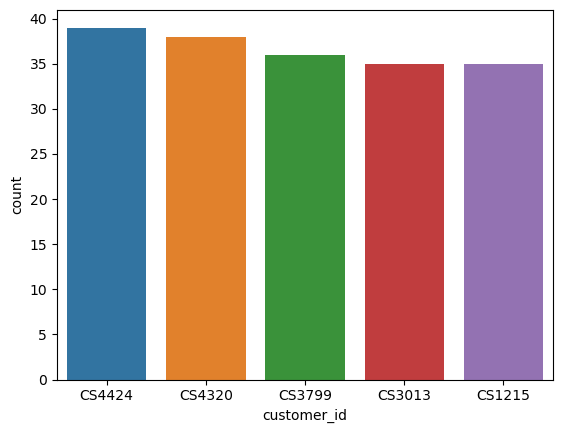

In [23]:
sns.barplot(x= 'customer_id', y= 'count', data= top_5_cus)

In [24]:
# Customer having highest values of orders

customer_sales= df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales

,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [25]:
# Sort

top_5_sal= customer_sales.sort_values( by='tran_amount', ascending= False).head(5)

top_5_sal

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

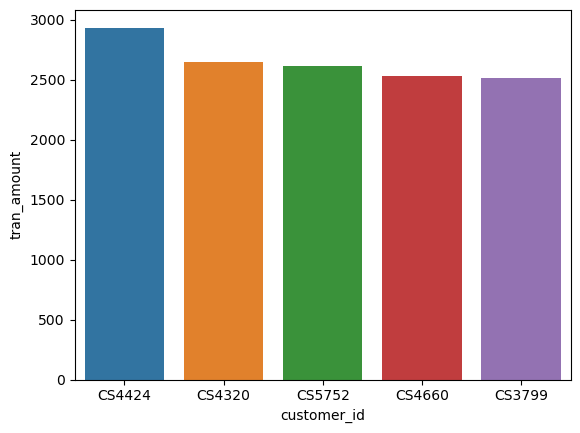

In [26]:
sns.barplot(x='customer_id', y='tran_amount', data=top_5_sal)

ADVANCE ANALYTICS

The series Analysis

In [27]:
import matplotlib.dates as mdates

df['month_year']= pd.to_datetime(df['trans_date']).dt.to_period('M')

C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\3612550774.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['month_year']= pd.to_datetime(df['trans_date']).dt.to_period('M')
C:\Users\Toshiba\AppData\Local\Temp\ipykernel_12940\3612550774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']= pd.to_datetime(df['trans_date']).dt.to_period('M')


In [28]:
df

,customer_id,trans_date,tran_amount,response,trans_data,month,month_year
0,CS5295,11-Feb-13,35,1,2013-02-11,2013-02,2013-02
1,CS4768,15-Mar-15,39,1,2015-03-15,2015-03,2015-03
2,CS2122,26-Feb-13,52,0,2013-02-26,2013-02,2013-02
3,CS1217,16-Nov-11,99,0,2011-11-16,2011-11,2011-11
4,CS1850,20-Nov-13,78,0,2013-11-20,2013-11,2013-11
...,...,...,...,...,...,...,...
124995,CS8433,26-Jun-11,64,0,2011-06-26,2011-06,2011-06
124996,CS7232,19-Aug-14,38,0,2014-08-19,2014-08,2014-08
124997,CS8731,28-Nov-14,42,0,2014-11-28,2014-11,2014-11
124998,CS8133,14-Dec-13,13,0,2013-12-14,2013-12,2013-12


AttributeError: module 'matplotlib.dates' has no attribute 'Dateformatter'

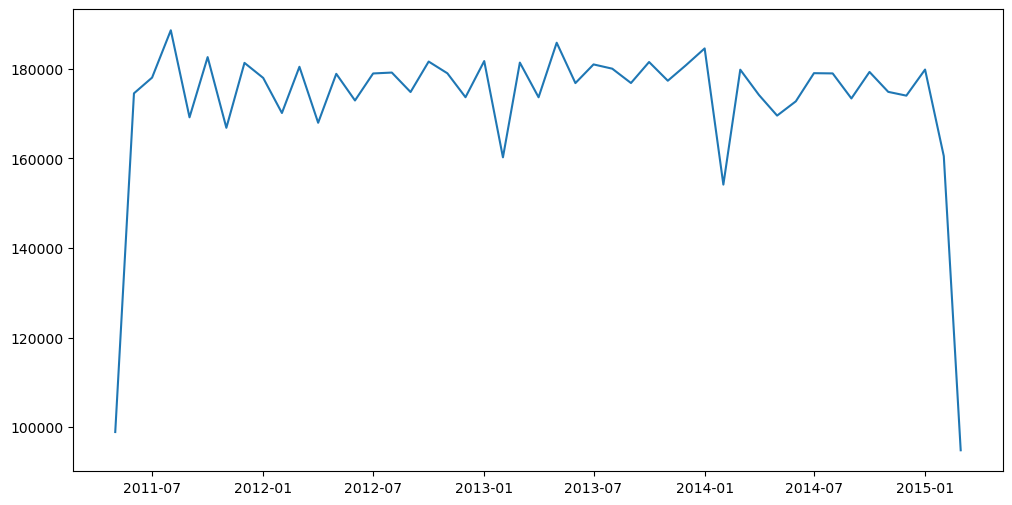

In [29]:
monthly_sales= df.groupby('month_year')['tran_amount'].sum()

monthly_sales.index= monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)

plt.gca().xaxis.set_major_formatter(mdates.Dateformatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.month_locater('interval=6'))

plt.xlabel('month-year')
plt.ylabel('sales')
plt.title('monthly_sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Cohort Segmentation

In [38]:
# Recency

recency=df.groupby('customer_id')['trans_date'].max()

#Frequency

frequency= df.groupby('customer_id')['trans_date'].count()

#Monetory

monetary= df.groupby('customer_id')['tran_amount'].sum()

# combine

rfm=pd.DataFrame({'recency':recency, 'frequency':frequency, 'monetary':monetary})
rfm

,recency,frequency,monetary
customer_id,,,
CS1112,29-Apr-14,15,1012
CS1113,30-Mar-12,20,1490
CS1114,31-Dec-14,19,1432
CS1115,27-Jun-13,22,1659
CS1116,30-May-14,13,857
...,...,...,...
CS8996,29-Sep-12,13,582
CS8997,31-May-12,14,543
CS8998,27-Jul-12,13,624


In [55]:
import pandas as pd

# Assuming your dataframe 'rfm' is defined and contains the relevant columns
# Convert 'recency' column to datetime
rfm['recency'] = pd.to_datetime(rfm['recency'], errors='coerce')  # Use errors='coerce' to handle any conversion errors gracefully

# Check the data types to verify conversion
print(rfm.dtypes)



recency      datetime64[ns]
frequency             int64
monetary              int64
Segment              object
dtype: object


In [56]:
#customer segmentation

def segment_customer(row):
    if pd.isnull(row['recency']):  # Handle NaN values if any
        return 'P2'  # or any other default segment

    if row['recency'].year >= 2012 and row['frequency'] >= 15 and row['monetary'] > 1000:
        return 'P0'
    elif 2011 <= row['recency'].year < 2012 and 10 < row['frequency'] < 15 and 500 <= row['monetary'] <= 1000:
        return 'P1'
    else:
        return 'P2'

# Apply the segmentation function
rfm['Segment'] = rfm.apply(segment_customer, axis=1)

# Print the resulting DataFrame to check
print(rfm)


               recency  frequency  monetary Segment
customer_id                                        
CS1112      2014-04-29         15      1012      P0
CS1113      2012-03-30         20      1490      P0
CS1114      2014-12-31         19      1432      P0
CS1115      2013-06-27         22      1659      P0
CS1116      2014-05-30         13       857      P2
...                ...        ...       ...     ...
CS8996      2012-09-29         13       582      P2
CS8997      2012-05-31         14       543      P2
CS8998      2012-07-27         13       624      P2
CS8999      2012-09-29         12       383      P2
CS9000      2015-02-28         13       533      P2

[6884 rows x 4 columns]


Churn Analysis

<Axes: xlabel='response'>

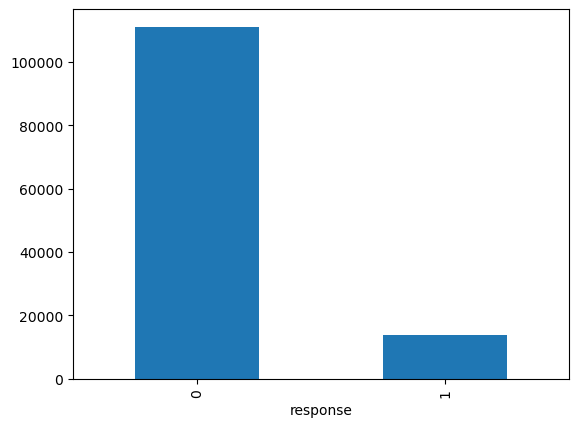

In [57]:
#Count the number of churned and active customers

churn_counts= df['response'].value_counts()
# Plot
churn_counts.plot(kind= 'bar')

Analyzing top customer

<Axes: xlabel='month_year'>

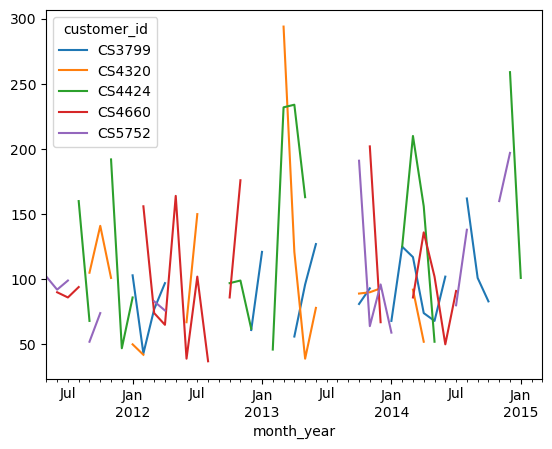

In [61]:
top_5_cus= monetary.sort_values(ascending= False).head(5).index

top_customers_df= df[df['customer_id'].isin(top_5_cus)]

top_customer_sales= top_customers_df.groupby(['customer_id', 'month_year'])['tran_amount'].sum().unstack(level=0)
                                              
top_customer_sales.plot(kind= 'line')
                                              

In [62]:
df.to_csv('MainData.csv')

In [63]:
rfm.to_csv('AddAnlys.csv')